In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

# Some libraries for PCA visualization
import seaborn as sns
#Make Plotly figure
import chart_studio.plotly as py
# Be aware, plotly may be installed using pip on your shell:
# conda install -c plotly chart-studio
import plotly.graph_objs as go

script_dir = Path.cwd() 
df = pd.read_csv(script_dir.parent / '4 - Dataset' / "regression_weld_data.csv")

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1652 non-null   float64
 4   Phosphorus concentration (weight%)            1652 non-null   float64
 5   Oxygen concentration (%)                      1652 non-null   float64
 6   Nitrogen concentration (%)                    1652 non-null   float64
 7   Current (A)                                   1652 non-null   float64
 8   Voltage (V)                                   1652 non-null   float64
 9   Heat input (kJ/mm)                            1652 non-null   f

In [17]:
y = df.iloc[:,25:]
y_cleand = y.dropna()
print(y_cleand.shape)

(134, 6)


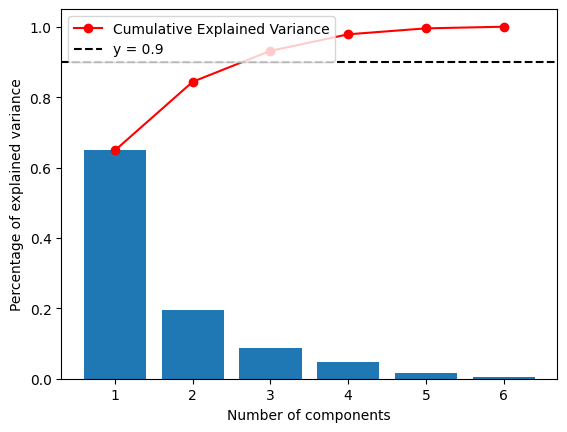

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def scale(X,scaler=MinMaxScaler()) :
    scaler = scaler
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    return X_scaled

#X = df.iloc[:,:25]
X = y_cleand
X_norm = scale(X, StandardScaler())

algoPCA = PCA().fit(X_norm)

#plt.plot(np.cumsum(algoPCA.explained_variance_ratio_), marker = 'o')
#plt.grid()
#plt.xlabel('Nombre de composantes')
#plt.ylabel('Cumulative explained variance')

# Explained variance plot
plt.bar(range(1,len(algoPCA.explained_variance_ratio_ )+1),algoPCA.explained_variance_ratio_ )
plt.ylabel('Percentage of explained variance')
plt.xlabel('Number of components')
plt.plot(range(1,len(algoPCA.explained_variance_ratio_ )+1),
         np.cumsum(algoPCA.explained_variance_ratio_ ),
         c='red',
         label="Cumulative Explained Variance",
         marker = 'o')
# Ajouter une barre horizontale en pointillé rouge à y = 0.9
plt.axhline(y=0.9, color='black', linestyle='--', label='y = 0.9')
plt.legend(loc='upper left')


In [20]:
pcamodel = PCA(n_components=3)
pca = pcamodel.fit_transform(scale(X))

Text(0.5, 0, 'PCA 1')

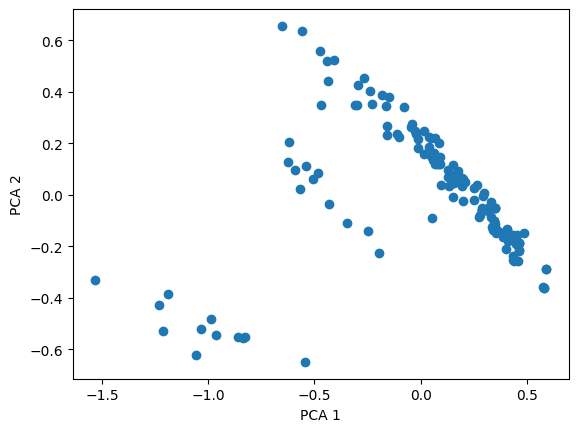

In [21]:
# Scatter plot of PCA1 and PCA2

plt.scatter(pca[:, 0], pca[:, 1])
plt.ylabel('PCA 2')
plt.xlabel('PCA 1')

In [24]:
# 3D Scatter plot of PCA1,PCA2 and PCA3
import chart_studio.plotly as py
# Be aware, plotly may be installed using pip on your shell:
# conda install -c plotly chart-studio
import plotly.graph_objs as go

import chart_studio.tools

# Create your api key here: https://chart-studio.plotly.com/settings/api#/
chart_studio.tools.set_credentials_file(username='mtami', api_key='9ELjOICgf6qmGEK5WkiJ')

fig1 = go.Scatter3d(x=pca[:, 0],
                    y=pca[:, 1],
                    z=pca[:, 2],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="PCA1"),
                                yaxis=dict( title="PCA2"),
                                zaxis=dict(title="PCA3")),)

#Plot and save html
py.iplot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("3DPlot.html"))



Text(0.5, 1.0, 'The effect of features on each components')

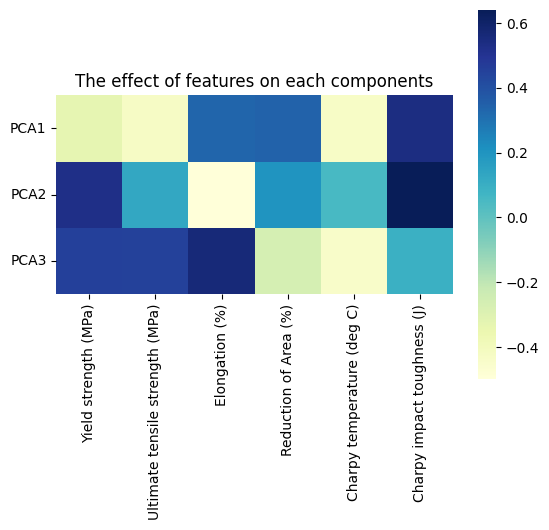

In [22]:
# Effect of variables on each components

ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(X_test) for X_test in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(X.columns),
                 cbar_kws={"orientation": "vertical"})
plt.yticks(rotation=0)
ax.set_aspect("equal")
plt.title('The effect of features on each components')

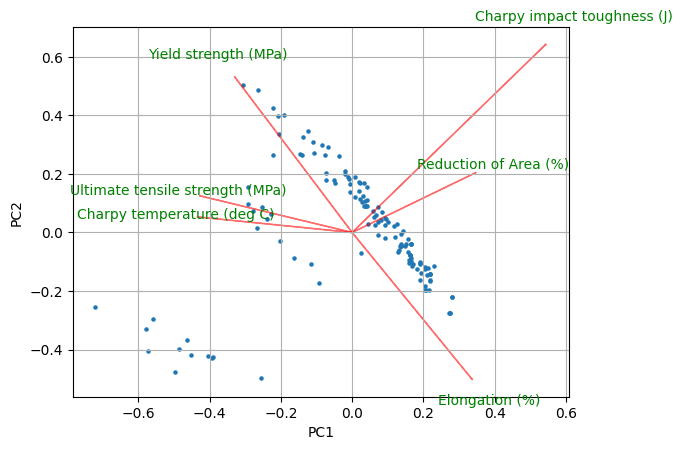

In [23]:
# PCA Biplot

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(X.columns))
plt.show()


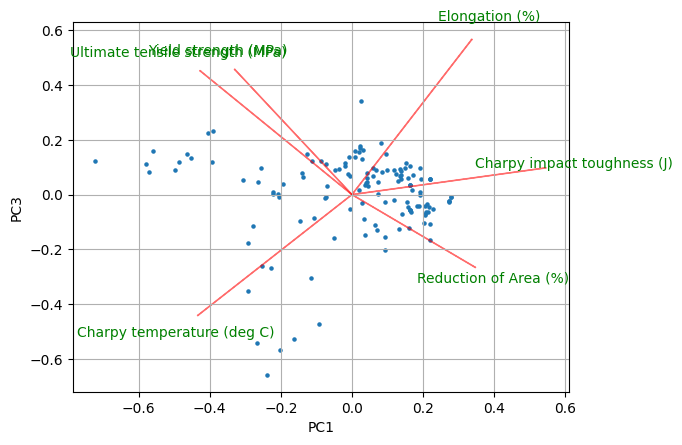

In [26]:
# PCA Biplot (PC1 and PC3)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(3))
    plt.grid()



myplot(pca.take([0,2],axis=1),np.transpose(pcamodel.components_).take([0,2],axis=1),list(X.columns))
plt.show()